# FLIGHTONTIME - PIPELINE COMPLETO DE ETL
**Dataset**: BTS On-Time Performance (2023-2024) + Open-Meteo Weather Data
**Automação**: Download direto da pasta Google Drive (sem upload manual)

Link da pasta: https://drive.google.com/drive/folders/1odSdTTDVThmDi3OhgofKjJYKyaJ5eG4m?usp=drive_link

**Autor:** H12-25-B-Equipo 15-Data Science

**Data:** Dezembro 2025

Este notebook baixa todos os CSVs da pasta, processa o ETL e gera o dataset final com features climáticas.

In [3]:
import pandas as pd
import numpy as np
import warnings
import glob
import os
import requests

# Tenta importar gdown, instala se não existir
try:
    import gdown
except ImportError:
    !pip install gdown -q
    import gdown

warnings.filterwarnings('ignore')

print("🚀 Iniciando pipeline FlightOnTime Resiliente...")

🚀 Iniciando pipeline FlightOnTime Resiliente...


## PARTE 1: DOWNLOAD AUTOMÁTICO DOS ARQUIVOS BTS DA PASTA GOOGLE DRIVE

In [4]:
folder_id = "1odSdTTDVThmDi3OhgofKjJYKyaJ5eG4m"
output_dir = "/content/bts_files"

# Criar pasta local se não existir
os.makedirs(output_dir, exist_ok=True)

print("\n📥 Tentando baixar/atualizar arquivos do Google Drive...")

# --- BLOCO TRY/EXCEPT (Resiliência) ---
try:
    # Tenta baixar. Se o Google bloquear, ele vai pular para o 'except'
    gdown.download_folder(f"https://drive.google.com/drive/folders/{folder_id}", quiet=False, output=output_dir)
except Exception as e:
    print("\n⚠️ ALERTA: O Google Drive interrompeu o download (provável limite de tráfego).")
    print("➡️ O script vai continuar processando os arquivos que JÁ foram baixados com sucesso.")
    # Opcional: imprimir o erro real se quiser debugar
    # print(f"Erro detalhado: {e}")

# --- BUSCA RECURSIVA (Correção anterior) ---
print("\n🔍 Inventariando arquivos baixados...")
# Usa glob recursivo para achar csv dentro de bts_files/2023/ e bts_files/2024/
csv_files = glob.glob(os.path.join(output_dir, "**", "*.csv"), recursive=True)
csv_files.sort() # Ordenar para garantir ordem temporal

print(f"Arquivos disponíveis para processamento: {len(csv_files)}")

if len(csv_files) == 0:
    print("❌ Falha crítica: Nenhum arquivo CSV foi baixado antes do bloqueio.")
else:
    # Ler e concatenar
    dfs = []
    print(f"\n⚙️ Processando {len(csv_files)} arquivos...")

    for filepath in csv_files:
        filename = os.path.basename(filepath)
        # print(f"  - Lendo {filename}...") # Comentei para não poluir o log se forem muitos
        try:
            df_temp = pd.read_csv(filepath, low_memory=False)
            dfs.append(df_temp)
        except Exception as e:
            print(f"  ❌ Erro ao ler {filename}: {e}")

    if dfs:
        df_bts = pd.concat(dfs, ignore_index=True)
        print(f"\n✅ SUCESSO: DataFrame consolidado criado!")
        print(f"📊 Total de linhas: {len(df_bts):,}")

        # Identificar coluna de data
        date_col = 'FL_DATE' if 'FL_DATE' in df_bts.columns else 'FlightDate'
        if date_col in df_bts.columns:
            # Converter para datetime para pegar min/max corretamente
            dates = pd.to_datetime(df_bts[date_col])
            print(f"📅 Período dos dados: {dates.min().date()} até {dates.max().date()}")

        print("\nPróximo passo: Pode seguir com sua análise exploratória ou limpeza.")
    else:
        print("❌ Erro: Lista de DataFrames vazia.")


📥 Tentando baixar/atualizar arquivos do Google Drive...


Retrieving folder contents


Retrieving folder 13PQe8pxlJPp9hfuCO_wipl7FIqi6TQzK 2023
Processing file 1Yf2wFW3yaSs7eSssV3TVH_QO4BgSDCvk 1_Jan_2023.csv
Processing file 1HaBM6pX-xfsRs3KnF4kQSP7fz0g1a8nT 2_Fev_2023.csv
Processing file 1vxNEJWyMiIdaaYr2XjOqO1Xb-aj7mewR 3_Mar_2023.csv
Processing file 1GXfELzxtCZcw-MAthJx2j2CFv9VX3PCG 4_Abr_2023.csv
Processing file 1B0yGcqa6VyVRXrRoXuWdYoXjqfUh4NEp 5_Mai_2023.csv
Processing file 1Glvd9boVdxGl3Dc46bsdvsC2idam7nV5 6_Jun_2023.csv
Processing file 1Y1Q4RDT23nqslTDejpcrBSpPLIrZj4VH 7_Jul_2023.csv
Processing file 1pl4PjhWDSG09RmAIbcNr68wtlQpn9Z7E 8_Ago_2023.csv
Processing file 1ZUY-0fiAOOkd-cWKoITNKPckH3NzzS7e 9_Set_2023.csv
Processing file 1yhkQZ2W2ooQlNQ1PsGkL70Ii-3Ru3OEv 10_Out_2023.csv
Processing file 1oRHxhB90FNTpZ5W6KUnWRPGmSTHduAjz 11_Nov_2023.csv
Processing file 1K0ALE-fRZjQLWNiUFne69BFy0Lw8PG5F 12_Dez_2023.csv
Retrieving folder 1MCdxOAMxckVnsAoL3rdq3vuDjQ0UO4-q 2024
Processing file 1NxaSMl18cYh09RG_Eui1AoKJ6qXUE-5c 1_Jan_2024.csv
Processing file 1VqgjYJWiQYNbUrIXlHFdE

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1Yf2wFW3yaSs7eSssV3TVH_QO4BgSDCvk
To: /content/bts_files/2023/1_Jan_2023.csv
100%|██████████| 58.7M/58.7M [00:00<00:00, 77.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HaBM6pX-xfsRs3KnF4kQSP7fz0g1a8nT
To: /content/bts_files/2023/2_Fev_2023.csv
100%|██████████| 54.8M/54.8M [00:00<00:00, 78.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vxNEJWyMiIdaaYr2XjOqO1Xb-aj7mewR
To: /content/bts_files/2023/3_Mar_2023.csv
100%|██████████| 63.0M/63.0M [00:00<00:00, 97.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GXfELzxtCZcw-MAthJx2j2CFv9VX3PCG
To: /content/bts_files/2023/4_Abr_2023.csv
100%|██████████| 61.0M/61.0M [00:00<00:00, 102MB/s]
Downloading...
From: https://drive.google.com/uc?id=1B0yGcqa6VyVRXrRoXuWdYoXjqfUh4NEp
To: /content/bts_files/2023/5_Mai_2023.csv
100%|██████████| 63.1M/63.1M [00:00<00:


🔍 Inventariando arquivos baixados...
Arquivos disponíveis para processamento: 24

⚙️ Processando 24 arquivos...

✅ SUCESSO: DataFrame consolidado criado!
📊 Total de linhas: 14,825,727
📅 Período dos dados: 2023-01-01 até 2024-12-31

Próximo passo: Pode seguir com sua análise exploratória ou limpeza.


 🚀 Otimização de Memória (Best Practice)

In [5]:
# 1. Verificar consumo de memória atual
print("📊 Consumo de memória INICIAL:")
df_bts.info(memory_usage='deep')

# 2. Otimização de Tipos (Data Engineering Best Practice)
# Converter colunas de objeto para categoria (se tiverem poucas variações, ex: Nome da Aerolinea)
# Converter datas para datetime
# Converter float64 para float32 se não precisar de precisão decimal extrema

# Exemplo de conversão de data (essencial para séries temporais)
col_date = 'FL_DATE' if 'FL_DATE' in df_bts.columns else 'FlightDate'
df_bts[col_date] = pd.to_datetime(df_bts[col_date])

print(f"\n🔄 Convertendo {col_date} para datetime...")

# 3. Salvar em Parquet (MUITO mais rápido e leve que CSV para leitura futura)
# O Parquet mantém os tipos de dados (schema), o CSV não.
output_file = "flight_data_consolidated.parquet"
print(f"\n💾 Salvando backup otimizado em {output_file}...")
df_bts.to_parquet(output_file, index=False)

print("\n✅ Pipeline de Ingestão Finalizado com Sucesso.")

📊 Consumo de memória INICIAL:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825727 entries, 0 to 14825726
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   YEAR                int64  
 1   MONTH               int64  
 2   DAY_OF_MONTH        int64  
 3   DAY_OF_WEEK         int64  
 4   FL_DATE             object 
 5   MKT_UNIQUE_CARRIER  object 
 6   ORIGIN              object 
 7   ORIGIN_STATE_ABR    object 
 8   DEST                object 
 9   DEST_CITY_NAME      object 
 10  DEST_STATE_ABR      object 
 11  CRS_DEP_TIME        int64  
 12  DEP_DELAY           float64
 13  CANCELLED           float64
 14  DIVERTED            float64
 15  CRS_ELAPSED_TIME    float64
 16  DISTANCE            float64
dtypes: float64(5), int64(5), object(7)
memory usage: 6.5 GB

🔄 Convertendo FL_DATE para datetime...

💾 Salvando backup otimizado em flight_data_consolidated.parquet...

✅ Pipeline de Ingestão Finalizado com Sucesso.


🛠️ Otimização de Memória (Downcasting)

Para reduzir o consumo de 6.5 GB, vamos converter as colunas para o tipo de dado que requer o mínimo de memória possível, sem perder informações críticas.

In [6]:
def downcast_dataframe(df):
    """
    Reduz o uso de memória de um DataFrame convertendo
    tipos de dados para formatos mais eficientes.
    """

    # Lista de colunas para ignorar (datas já convertidas ou colunas específicas)
    cols_to_ignore = ['FL_DATE']

    # 1. Converter Inteiros/Floats
    print("Reduzindo Inteiros e Floats...")
    for col in df.columns:
        if col in cols_to_ignore:
            continue

        if df[col].dtype == 'int64':
            # Tenta converter para o menor inteiro possível (int8, int16, int32)
            df[col] = pd.to_numeric(df[col], downcast='integer')

        elif df[col].dtype == 'float64':
            # Tenta converter para float32 (redução de 50% de memória)
            df[col] = pd.to_numeric(df[col], downcast='float')

    # 2. Converter Objetos (Strings) para Categóricos
    # Ideal para colunas com baixa cardinalidade (poucos valores únicos)
    # Colunas como ORIGIN, DEST, MKT_UNIQUE_CARRIER são excelentes candidatas.
    print("Convertendo Strings para Categórico...")
    for col in df.select_dtypes(include=['object']).columns:
        # Se a proporção de valores únicos for baixa (ex: menos de 5% do total de linhas)
        num_unique = df[col].nunique()
        num_total = len(df)
        if (num_unique / num_total) < 0.05:
            df[col] = df[col].astype('category')
            print(f"  -> {col} convertido para 'category' ({num_unique} valores únicos)")
        else:
             print(f"  -> {col} mantido como 'object' (Alta cardinalidade: {num_unique} valores únicos)")

    return df

# Chamar a função de otimização
df_bts = downcast_dataframe(df_bts)

# 3. Verificar consumo de memória FINAL
print("\n📊 Consumo de memória FINAL após Downcasting:")
df_bts.info(memory_usage='deep')

# 4. Exibir a redução
initial_memory = 6.5 # GB, valor inicial
final_info = df_bts.info(memory_usage='deep', verbose=False)
final_memory_bytes = df_bts.memory_usage(deep=True).sum()
final_memory_gb = final_memory_bytes / (1024**3)

print(f"\n✨ Redução de memória alcançada: {(initial_memory - final_memory_gb) / initial_memory:.2%} (de {initial_memory:.2f} GB para {final_memory_gb:.2f} GB)")

Reduzindo Inteiros e Floats...
Convertendo Strings para Categórico...
  -> MKT_UNIQUE_CARRIER convertido para 'category' (10 valores únicos)
  -> ORIGIN convertido para 'category' (362 valores únicos)
  -> ORIGIN_STATE_ABR convertido para 'category' (52 valores únicos)
  -> DEST convertido para 'category' (362 valores únicos)
  -> DEST_CITY_NAME convertido para 'category' (356 valores únicos)
  -> DEST_STATE_ABR convertido para 'category' (52 valores únicos)

📊 Consumo de memória FINAL após Downcasting:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825727 entries, 0 to 14825726
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   YEAR                int16         
 1   MONTH               int8          
 2   DAY_OF_MONTH        int8          
 3   DAY_OF_WEEK         int8          
 4   FL_DATE             datetime64[ns]
 5   MKT_UNIQUE_CARRIER  category      
 6   ORIGIN              category      
 7   ORIGIN_STAT

## PARTE 2: LIMPEZA E FILTRAGEM

In [7]:
print("\n🧹 PARTE 2: Limpeza e filtragem dos dados...")

# Remover voos cancelados e desviados (fallback se colunas não existirem)
if 'CANCELLED' in df_bts.columns:
    df_clean = df_bts[(df_bts['CANCELLED'] == 0) & (df_bts.get('DIVERTED', 0) == 0)].copy()
else:
    df_clean = df_bts.copy()  # Se não tiver, assume todos válidos
print(f"❌ Removidos {len(df_bts) - len(df_clean):,} voos cancelados/desviados")

# Filtrar apenas as principais companhias (ajustado para códigos reais)
principais_companhias = ['AA', 'DL', 'UA', 'WN', 'B6', 'AS', 'NK', 'F9', 'G4', 'HA']
if 'MKT_UNIQUE_CARRIER' in df_clean.columns:
    df_clean = df_clean[df_clean['MKT_UNIQUE_CARRIER'].isin(principais_companhias)]
print(f"✈️ Mantidas apenas as top 10 companhias: {len(df_clean):,} voos")

# Remover valores nulos críticos (ajustado para nomes reais)
critical_cols = ['DEP_DELAY', 'CRS_DEP_TIME', 'DISTANCE', 'ORIGIN', 'DEST']
available_critical = [col for col in critical_cols if col in df_clean.columns]
df_clean = df_clean.dropna(subset=available_critical)
print(f"🗑️ Após remover nulos: {len(df_clean):,} voos")

# Converter FlightDate para datetime (ajustado para formato BTS)
date_col = 'FL_DATE' if 'FL_DATE' in df_clean.columns else 'FlightDate'
df_clean[date_col] = pd.to_datetime(df_clean[date_col].astype(str).str.split().str[0])  # Remove horário se presente
df_clean.rename(columns={date_col: 'FlightDate'}, inplace=True)


🧹 PARTE 2: Limpeza e filtragem dos dados...
❌ Removidos 233,433 voos cancelados/desviados
✈️ Mantidas apenas as top 10 companhias: 14,592,294 voos
🗑️ Após remover nulos: 14,592,294 voos


## PARTE 3: OBTER COORDENADAS DOS AEROPORTOS

In [8]:
print("\n🌍 PARTE 3: Obtendo coordenadas dos aeroportos...")

# Dicionário com coordenadas (mesmo do código original)
airport_coords = {
    'ATL': (33.6407, -84.4277), 'DFW': (32.8998, -97.0403), 'DEN': (39.8561, -104.6737),
    'ORD': (41.9742, -87.9073), 'LAX': (33.9416, -118.4085), 'JFK': (40.6413, -73.7781),
    'LAS': (36.0840, -115.1537), 'MCO': (28.4312, -81.3081), 'MIA': (25.7959, -80.2870),
    'CLT': (35.2144, -80.9473), 'SEA': (47.4502, -122.3088), 'PHX': (33.4352, -112.0101),
    'EWR': (40.6895, -74.1745), 'SFO': (37.6213, -122.3790), 'IAH': (29.9902, -95.3368),
    'BOS': (42.3656, -71.0096), 'FLL': (26.0742, -80.1506), 'MSP': (44.8848, -93.2223),
    'LGA': (40.7769, -73.8740), 'DTW': (42.2162, -83.3554), 'PHL': (39.8729, -75.2437),
    'SLC': (40.7899, -111.9791), 'DCA': (38.8521, -77.0377), 'BWI': (39.1774, -76.6684),
    'SAN': (32.7336, -117.1897), 'TPA': (27.9755, -82.5332), 'PDX': (45.5898, -122.5951),
    'STL': (38.7499, -90.3704), 'HNL': (21.3245, -157.9250), 'AUS': (30.1945, -97.6699),
    'MDW': (41.7860, -87.7524), 'BNA': (36.1263, -86.6774), 'IAD': (38.9531, -77.4565),
    'DAL': (32.8470, -96.8517), 'RDU': (35.8776, -78.7875), 'SMF': (38.6954, -121.5908),
    'SNA': (33.6762, -117.8679), 'SJC': (37.3639, -121.9289), 'MCI': (39.2976, -94.7139),
    'OAK': (37.7213, -122.2208), 'SAT': (29.5337, -98.4698), 'RSW': (26.5316, -81.7554),
    'IND': (39.7173, -86.2944), 'CLE': (41.4093, -81.8498), 'PIT': (40.4915, -80.2329),
    'CVG': (39.0533, -84.6630), 'CMH': (39.9980, -82.8919), 'ABQ': (35.0402, -106.6092),
    'MSY': (29.9844, -90.2580), 'OKC': (35.3931, -97.6007), 'BUR': (34.2007, -118.3587),
    'ONT': (34.0560, -117.6012), 'ANC': (61.1743, -149.9962),
    'GRU': (-23.4356, -46.4731), 'GIG': (-22.8099, -43.2505)
}

# Renomear colunas de origem/destino se necessário (BTS usa ORIGIN/DEST em maiúsculo)
df_clean.rename(columns={'ORIGIN': 'Origin', 'DEST': 'Dest'}, inplace=True, errors='ignore')

# Adicionar coordenadas
df_clean['origin_lat'] = df_clean['Origin'].map(lambda x: airport_coords.get(x, (None, None))[0])
df_clean['origin_lon'] = df_clean['Origin'].map(lambda x: airport_coords.get(x, (None, None))[1])

# Remover sem coordenadas
df_clean = df_clean.dropna(subset=['origin_lat', 'origin_lon'])
print(f"✅ Coordenadas adicionadas. Aeroportos únicos: {df_clean['Origin'].nunique()}")


🌍 PARTE 3: Obtendo coordenadas dos aeroportos...
✅ Coordenadas adicionadas. Aeroportos únicos: 53


## 🌤️ PARTE 4: DADOS CLIMÁTICOS (OPICIONAL - Pulado no MVP)

In [9]:
print("\n🌤️ PARTE 4: Dados Climáticos (OPCIONAL - Pulado no MVP)")
print("⚠️ DECISÃO: Open-Meteo requer 38K+ requisições (impossível com plano gratuito)")
print("✅ ALTERNATIVA: Modelo inicial sem features climáticas")
print("\n📝 Criando colunas vazias para manter compatibilidade com pipeline...")

# Adicionar colunas climáticas vazias (podem ser preenchidas futuramente)
df_clean['temperature'] = None
df_clean['precipitation'] = None

print(f"✅ Colunas criadas: temperature (todos None), precipitation (todos None)")
print(f"📊 Dataset pronto para feature engineering e modelagem")
print(f"💡 Próxima etapa: Criar features temporais (hora, dia da semana, etc.)")


🌤️ PARTE 4: Dados Climáticos (OPCIONAL - Pulado no MVP)
⚠️ DECISÃO: Open-Meteo requer 38K+ requisições (impossível com plano gratuito)
✅ ALTERNATIVA: Modelo inicial sem features climáticas

📝 Criando colunas vazias para manter compatibilidade com pipeline...
✅ Colunas criadas: temperature (todos None), precipitation (todos None)
📊 Dataset pronto para feature engineering e modelagem
💡 Próxima etapa: Criar features temporais (hora, dia da semana, etc.)


## 🔧 PARTE 5: FEATURE ENGINEERING

In [12]:
print("\n🔧 PARTE 5: FEATURE ENGINEERING (v2.2 - FINAL)")
print("Criando variáveis preditivas evitando data leakage...\n")

# ========================================
# 0. VALIDAÇÃO INICIAL
# ========================================
print("🔍 Validando dataset...")
print(f"✅ Dataset carregado: {len(df_clean):,} voos")
print(f"✅ Período: {df_clean['FlightDate'].min()} até {df_clean['FlightDate'].max()}\n")

# ========================================
# 1. VARIÁVEL TARGET (Y)
# ========================================
print("🎯 Criando variável target (Y)...")

# Threshold de 15 minutos (padrão DOT/FAA)
df_clean['is_delayed'] = (df_clean['DEP_DELAY'] > 15).astype(int)

delayed_count = df_clean['is_delayed'].sum()
ontime_count = len(df_clean) - delayed_count

print(f"✅ Target criado: 'is_delayed' (0 = Pontual, 1 = Atrasado)")
print(f"   - Pontual: {ontime_count:,} voos ({ontime_count/len(df_clean)*100:.1f}%)")
print(f"   - Atrasado: {delayed_count:,} voos ({delayed_count/len(df_clean)*100:.1f}%)")

# Verificar balanceamento
delay_rate = delayed_count / len(df_clean)
if delay_rate < 0.3 or delay_rate > 0.7:
    print(f"   ⚠️ Dataset desbalanceado ({delay_rate:.1%})! Usar class_weight='balanced' no modelo")

# ========================================
# 2. FEATURES TEMPORAIS (SEM LEAKAGE)
# ========================================
print("\n📅 Extraindo features temporais...")

# Converter CRS_DEP_TIME (formato HHMM inteiro) para hora
df_clean['dep_hour'] = (df_clean['CRS_DEP_TIME'] // 100).astype('int8')

# Validar valores (CRS_DEP_TIME pode ter valores como 2400 = meia-noite)
invalid_hours = (df_clean['dep_hour'] > 23) | (df_clean['dep_hour'] < 0)
if invalid_hours.any():
    print(f"   🔧 Corrigindo {invalid_hours.sum():,} valores inválidos em dep_hour...")
    df_clean.loc[df_clean['dep_hour'] == 24, 'dep_hour'] = 0  # 2400 -> 00:00
    df_clean['dep_hour'] = df_clean['dep_hour'].clip(0, 23).astype('int8')

# Final de semana (DAY_OF_WEEK: 1=Segunda, ..., 7=Domingo)
df_clean['is_weekend'] = (df_clean['DAY_OF_WEEK'].isin([6, 7])).astype('int8')

# Trimestre
df_clean['quarter'] = ((df_clean['MONTH'] - 1) // 3 + 1).astype('int8')

# Período do dia
def classify_time_of_day(hour):
    if pd.isna(hour):
        return 'Unknown'
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df_clean['time_of_day'] = df_clean['dep_hour'].apply(classify_time_of_day).astype('category')

print(f"✅ Features temporais criadas:")
print(f"   - dep_hour: {df_clean['dep_hour'].nunique()} horas únicas (0-23)")
print(f"   - is_weekend: {df_clean['is_weekend'].sum():,} voos no fim de semana ({df_clean['is_weekend'].mean()*100:.1f}%)")
print(f"   - quarter: Trimestres 1-4")
print(f"   - time_of_day: {dict(df_clean['time_of_day'].value_counts())}")

# ========================================
# 3. FEATURES DE ROTA (SEM LEAKAGE)
# ========================================
print("\n✈️ Criando features de rota...")

# Criar identificador de rota (Origem_Destino)
df_clean['route'] = (df_clean['Origin'].astype(str) + '_' +
                      df_clean['Dest'].astype(str)).astype('category')

unique_routes = df_clean['route'].nunique()
print(f"   - Rotas únicas identificadas: {unique_routes:,}")

# CRÍTICO: Ordenar por data ANTES de calcular features acumuladas
print("   🔄 Ordenando dataset temporalmente (evitando data leakage)...")
df_clean = df_clean.sort_values('FlightDate').reset_index(drop=True)

# Frequência acumulada de cada rota (quantos voos já aconteceram nesta rota)
df_clean['route_frequency'] = df_clean.groupby('route').cumcount().astype('int32')

# Categoria de distância
def classify_distance(distance):
    if pd.isna(distance):
        return 'Unknown'
    if distance < 500:
        return 'Short'      # < 500 milhas
    elif distance < 1500:
        return 'Medium'     # 500-1500 milhas
    else:
        return 'Long'       # > 1500 milhas

df_clean['distance_category'] = df_clean['DISTANCE'].apply(classify_distance).astype('category')

dist_distribution = df_clean['distance_category'].value_counts()
print(f"✅ Features de rota criadas:")
print(f"   - route: {unique_routes:,} combinações origem-destino")
print(f"   - route_frequency: Frequência acumulada por rota")
print(f"   - distance_category: {dict(dist_distribution)}")

# ========================================
# 4. FEATURES DE AEROPORTO (APROXIMAÇÃO MENSAL - RÁPIDA)
# ========================================
print("\n🛫 Criando features de aeroporto e companhia...")
print("   ⚡ Usando aproximação mensal (rápida e sem leakage)...")

# Criar coluna auxiliar ano-mês
df_clean['year_month'] = df_clean['FlightDate'].dt.to_period('M')

# Calcular taxa de atraso por (Aeroporto, Mês) e (Companhia, Mês)
print("   📊 Calculando taxas históricas por mês...")

# Para cada aeroporto e mês, qual foi a taxa de atraso?
origin_month_stats = df_clean.groupby(['Origin', 'year_month']).agg({
    'is_delayed': 'mean'  # taxa de atraso
}).reset_index()
origin_month_stats.columns = ['Origin', 'year_month', 'origin_delay_rate_monthly']

# Para cada companhia e mês
carrier_month_stats = df_clean.groupby(['MKT_UNIQUE_CARRIER', 'year_month']).agg({
    'is_delayed': 'mean'
}).reset_index()
carrier_month_stats.columns = ['MKT_UNIQUE_CARRIER', 'year_month', 'carrier_delay_rate_monthly']

# Fazer merge e shiftar 1 período (usar dados do mês ANTERIOR)
df_clean = df_clean.merge(origin_month_stats, on=['Origin', 'year_month'], how='left')
df_clean = df_clean.merge(carrier_month_stats, on=['MKT_UNIQUE_CARRIER', 'year_month'], how='left')

# Shiftar para o mês anterior (evitar leakage)
df_clean['origin_delay_rate'] = df_clean.groupby('Origin')['origin_delay_rate_monthly'].shift(1)
df_clean['carrier_delay_rate'] = df_clean.groupby('MKT_UNIQUE_CARRIER')['carrier_delay_rate_monthly'].shift(1)

# Preencher NaNs (primeiro mês de cada aeroporto/companhia) com média global
global_delay_rate = df_clean['is_delayed'].mean()
df_clean['origin_delay_rate'].fillna(global_delay_rate, inplace=True)
df_clean['carrier_delay_rate'].fillna(global_delay_rate, inplace=True)

# Converter para float32
df_clean['origin_delay_rate'] = df_clean['origin_delay_rate'].astype('float32')
df_clean['carrier_delay_rate'] = df_clean['carrier_delay_rate'].astype('float32')

# Volume de tráfego acumulado (quantos voos já saíram deste aeroporto)
df_clean['origin_traffic'] = df_clean.groupby('Origin').cumcount().astype('int32')

# Limpar colunas auxiliares
df_clean.drop(['year_month', 'origin_delay_rate_monthly', 'carrier_delay_rate_monthly'],
              axis=1, inplace=True, errors='ignore')

print(f"✅ Features históricas criadas:")
print(f"   - origin_delay_rate: Taxa de atraso do aeroporto (mês anterior)")
print(f"   - carrier_delay_rate: Taxa de atraso da companhia (mês anterior)")
print(f"   - origin_traffic: Volume de tráfego acumulado")

# ========================================
# 5. RENOMEAR COMPANHIA
# ========================================
df_clean.rename(columns={'MKT_UNIQUE_CARRIER': 'carrier'}, inplace=True)
print("\n✅ Coluna 'MKT_UNIQUE_CARRIER' renomeada para 'carrier'")

# ========================================
# 6. VALIDAÇÃO FINAL
# ========================================
print("\n🧹 Validação final...")

# Verificar valores nulos críticos
critical_features = ['dep_hour', 'carrier', 'Origin', 'Dest', 'DISTANCE', 'is_delayed']
null_counts = df_clean[critical_features].isnull().sum()

if null_counts.any():
    print("⚠️ Valores nulos encontrados:")
    for col, count in null_counts[null_counts > 0].items():
        print(f"   - {col}: {count:,} ({count/len(df_clean)*100:.2f}%)")
else:
    print("✅ Nenhum valor nulo nas features críticas")

# ========================================
# 7. RESUMO FINAL
# ========================================
print("\n" + "="*70)
print("📊 RESUMO DO FEATURE ENGINEERING")
print("="*70)

print(f"\n🔢 Dimensões do dataset:")
print(f"   - Total de voos: {len(df_clean):,}")
print(f"   - Total de colunas: {len(df_clean.columns)}")
print(f"   - Período: {df_clean['FlightDate'].min().date()} até {df_clean['FlightDate'].max().date()}")

print(f"\n📋 Features criadas para modelagem (16 features):")
model_features = [
    'carrier', 'Origin', 'Dest', 'route', 'dep_hour', 'DAY_OF_WEEK',
    'is_weekend', 'MONTH', 'quarter', 'time_of_day', 'DISTANCE',
    'distance_category', 'route_frequency', 'origin_delay_rate',
    'origin_traffic', 'carrier_delay_rate'
]

for i, feat in enumerate(model_features, 1):
    if feat in df_clean.columns:
        dtype = str(df_clean[feat].dtype)
        unique = df_clean[feat].nunique()
        print(f"   {i:2d}. {feat:25s} | {dtype:15s} | {unique:>8,} valores únicos")

print(f"\n🎯 Target: is_delayed")
target_dist = df_clean['is_delayed'].value_counts().sort_index()
print(f"   - 0 (Pontual):  {target_dist[0]:>10,} ({target_dist[0]/len(df_clean)*100:>5.1f}%)")
print(f"   - 1 (Atrasado): {target_dist[1]:>10,} ({target_dist[1]/len(df_clean)*100:>5.1f}%)")

print("\n✅ Feature Engineering Concluído (SEM DATA LEAKAGE)!")
print("💡 Próximo passo: Split treino/teste TEMPORAL + Treinamento do modelo")

# Salvar checkpoint
print("\n💾 Salvando checkpoint...")
df_clean.to_parquet('flight_data_with_features.parquet', index=False)
print("✅ Arquivo salvo: flight_data_with_features.parquet")
print(f"💾 Tamanho no disco: {os.path.getsize('flight_data_with_features.parquet') / (1024**2):.1f} MB")



🔧 PARTE 5: FEATURE ENGINEERING (v2.2 - FINAL)
Criando variáveis preditivas evitando data leakage...

🔍 Validando dataset...
✅ Dataset carregado: 11,408,131 voos
✅ Período: 2023-01-01 00:00:00 até 2024-12-31 00:00:00

🎯 Criando variável target (Y)...
✅ Target criado: 'is_delayed' (0 = Pontual, 1 = Atrasado)
   - Pontual: 9,080,892 voos (79.6%)
   - Atrasado: 2,327,239 voos (20.4%)
   ⚠️ Dataset desbalanceado (20.4%)! Usar class_weight='balanced' no modelo

📅 Extraindo features temporais...
   🔧 Corrigindo 1 valores inválidos em dep_hour...
✅ Features temporais criadas:
   - dep_hour: 24 horas únicas (0-23)
   - is_weekend: 3,134,922 voos no fim de semana (27.5%)
   - quarter: Trimestres 1-4
   - time_of_day: {'Morning': np.int64(4363939), 'Afternoon': np.int64(3927619), 'Evening': np.int64(2398629), 'Night': np.int64(717944)}

✈️ Criando features de rota...
   - Rotas únicas identificadas: 4,268
   🔄 Ordenando dataset temporalmente (evitando data leakage)...
✅ Features de rota criadas:

## 🤖 PARTE 6: MODELAGEM

In [13]:
print("\n🤖 PARTE 6: TREINAMENTO DE MODELOS DE MACHINE LEARNING")
print("="*70)

# ========================================
# 1. PREPARAÇÃO DOS DADOS
# ========================================
print("\n📦 Preparando dados para modelagem...")

# Features para treinar (remover colunas não usadas)
feature_cols = [
    'carrier', 'Origin', 'Dest', 'dep_hour', 'DAY_OF_WEEK',
    'is_weekend', 'MONTH', 'quarter', 'time_of_day', 'DISTANCE',
    'distance_category', 'route_frequency', 'origin_delay_rate',
    'origin_traffic', 'carrier_delay_rate'
]

# Verificar se todas as features existem
missing = [col for col in feature_cols if col not in df_clean.columns]
if missing:
    print(f"❌ Features faltando: {missing}")
else:
    print(f"✅ Todas as {len(feature_cols)} features estão disponíveis")

# Separar features (X) e target (y)
X = df_clean[feature_cols].copy()
y = df_clean['is_delayed'].copy()

print(f"   - X shape: {X.shape}")
print(f"   - y shape: {y.shape}")
print(f"   - Target distribution: {y.value_counts().to_dict()}")

# ========================================
# 2. SPLIT TEMPORAL (CRÍTICO PARA SÉRIES TEMPORAIS)
# ========================================
print("\n📅 Realizando split TEMPORAL treino/teste...")
print("   ⚠️ Não usar train_test_split aleatório (causaria data leakage!)")

# Usar 80% para treino (2023-01-01 até ~2024-09-30)
# Usar 20% para teste (últimos ~2 meses de 2024)
train_size = int(0.8 * len(df_clean))

X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

# Datas do split
train_dates = df_clean.iloc[:train_size]['FlightDate']
test_dates = df_clean.iloc[train_size:]['FlightDate']

print(f"✅ Split temporal realizado:")
print(f"   TREINO:")
print(f"      - {len(X_train):,} voos ({len(X_train)/len(X)*100:.1f}%)")
print(f"      - Período: {train_dates.min().date()} até {train_dates.max().date()}")
print(f"      - Atrasados: {y_train.sum():,} ({y_train.mean()*100:.1f}%)")
print(f"   TESTE:")
print(f"      - {len(X_test):,} voos ({len(X_test)/len(X)*100:.1f}%)")
print(f"      - Período: {test_dates.min().date()} até {test_dates.max().date()}")
print(f"      - Atrasados: {y_test.sum():,} ({y_test.mean()*100:.1f}%)")

# ========================================
# 3. ENCODING DE VARIÁVEIS CATEGÓRICAS
# ========================================
print("\n🔤 Aplicando encoding de variáveis categóricas...")

from sklearn.preprocessing import LabelEncoder

# Identificar colunas categóricas
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"   - Colunas categóricas: {categorical_cols}")

# Aplicar Label Encoding (mais eficiente para árvores de decisão)
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()

    # Fit no treino
    X_train[col] = le.fit_transform(X_train[col].astype(str))

    # Transform no teste (lidar com categorias novas)
    # Categorias não vistas no treino recebem -1
    X_test[col] = X_test[col].astype(str).apply(
        lambda x: le.transform([x])[0] if x in le.classes_ else -1
    )

    label_encoders[col] = le

print(f"✅ Encoding aplicado em {len(categorical_cols)} colunas")

# ========================================
# 4. REDUÇÃO DE AMOSTRA (OPCIONAL - ACELERAR TREINAMENTO)
# ========================================
print("\n⚡ Reduzindo amostra de treino para acelerar (opcional)...")
print("   💡 Com 11M de voos, treino pode demorar 30-60 minutos")
print("   💡 Usando 10% da amostra (~900k voos) para teste rápido")

# Sampling estratificado (manter proporção de classes)
from sklearn.model_selection import train_test_split

X_train_sample, _, y_train_sample, _ = train_test_split(
    X_train, y_train,
    train_size=0.1,  # 10% da amostra
    stratify=y_train,
    random_state=42
)

print(f"✅ Amostra reduzida:")
print(f"   - Treino original: {len(X_train):,} → Amostra: {len(X_train_sample):,}")
print(f"   - Proporção mantida: {y_train_sample.mean()*100:.1f}% atrasados")

# ========================================
# 5. TREINAMENTO DOS MODELOS
# ========================================
print("\n" + "="*70)
print("🏋️ TREINANDO MODELOS")
print("="*70)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import time

# Dicionário para armazenar resultados
results = {}

# ----------------------------------------
# MODELO 1: Logistic Regression (Baseline)
# ----------------------------------------
print("\n1️⃣ Treinando Logistic Regression (Baseline)...")
start_time = time.time()

lr = LogisticRegression(
    max_iter=100,
    class_weight='balanced',  # Lidar com desbalanceamento
    random_state=42,
    n_jobs=-1
)

lr.fit(X_train_sample, y_train_sample)
lr_time = time.time() - start_time

# Predições
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

# Métricas
results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred_lr),
    'precision': precision_score(y_test, y_pred_lr),
    'recall': recall_score(y_test, y_pred_lr),
    'f1': f1_score(y_test, y_pred_lr),
    'roc_auc': roc_auc_score(y_test, y_proba_lr),
    'time': lr_time
}

print(f"✅ Treinado em {lr_time:.1f}s")
print(f"   - Accuracy:  {results['Logistic Regression']['accuracy']:.3f}")
print(f"   - Precision: {results['Logistic Regression']['precision']:.3f}")
print(f"   - Recall:    {results['Logistic Regression']['recall']:.3f}")
print(f"   - F1-Score:  {results['Logistic Regression']['f1']:.3f}")
print(f"   - ROC-AUC:   {results['Logistic Regression']['roc_auc']:.3f}")

# ----------------------------------------
# MODELO 2: Random Forest (Complexo)
# ----------------------------------------
print("\n2️⃣ Treinando Random Forest...")
start_time = time.time()

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=100,
    min_samples_leaf=50,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    verbose=0
)

rf.fit(X_train_sample, y_train_sample)
rf_time = time.time() - start_time

# Predições
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Métricas
results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'precision': precision_score(y_test, y_pred_rf),
    'recall': recall_score(y_test, y_pred_rf),
    'f1': f1_score(y_test, y_pred_rf),
    'roc_auc': roc_auc_score(y_test, y_proba_rf),
    'time': rf_time
}

print(f"✅ Treinado em {rf_time:.1f}s")
print(f"   - Accuracy:  {results['Random Forest']['accuracy']:.3f}")
print(f"   - Precision: {results['Random Forest']['precision']:.3f}")
print(f"   - Recall:    {results['Random Forest']['recall']:.3f}")
print(f"   - F1-Score:  {results['Random Forest']['f1']:.3f}")
print(f"   - ROC-AUC:   {results['Random Forest']['roc_auc']:.3f}")

# ========================================
# 6. COMPARAÇÃO DE RESULTADOS
# ========================================
print("\n" + "="*70)
print("📊 COMPARAÇÃO DOS MODELOS")
print("="*70)

import pandas as pd

results_df = pd.DataFrame(results).T
results_df = results_df.round(3)

print("\n", results_df.to_string())

# Identificar melhor modelo
best_model = results_df['roc_auc'].idxmax()
print(f"\n🏆 MELHOR MODELO: {best_model} (ROC-AUC: {results_df.loc[best_model, 'roc_auc']:.3f})")

# ========================================
# 7. FEATURE IMPORTANCE (RANDOM FOREST)
# ========================================
print("\n📊 TOP 10 FEATURES MAIS IMPORTANTES (Random Forest):")

feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

for i, row in feature_importance.head(10).iterrows():
    print(f"   {row['feature']:30s} | {row['importance']:.4f}")

# ========================================
# 8. MATRIZ DE CONFUSÃO (MELHOR MODELO)
# ========================================
print(f"\n🔍 MATRIZ DE CONFUSÃO - {best_model}:")

if best_model == 'Random Forest':
    cm = confusion_matrix(y_test, y_pred_rf)
else:
    cm = confusion_matrix(y_test, y_pred_lr)

print(f"\n                  Predito")
print(f"                Pontual  Atrasado")
print(f"Real Pontual    {cm[0][0]:>7,}  {cm[0][1]:>8,}")
print(f"     Atrasado   {cm[1][0]:>7,}  {cm[1][1]:>8,}")

tn, fp, fn, tp = cm.ravel()
print(f"\n   - True Negatives:  {tn:>8,} (Pontual corretamente previsto)")
print(f"   - False Positives: {fp:>8,} (Previsto atrasado, mas era pontual)")
print(f"   - False Negatives: {fn:>8,} (Previsto pontual, mas atrasou)")
print(f"   - True Positives:  {tp:>8,} (Atrasado corretamente previsto)")

print("\n✅ Modelagem Concluída!")
print("💡 Próximo passo: Ajuste de hiperparâmetros ou deploy do modelo")


🤖 PARTE 6: TREINAMENTO DE MODELOS DE MACHINE LEARNING

📦 Preparando dados para modelagem...
✅ Todas as 15 features estão disponíveis
   - X shape: (11408131, 15)
   - y shape: (11408131,)
   - Target distribution: {0: 9080892, 1: 2327239}

📅 Realizando split TEMPORAL treino/teste...
   ⚠️ Não usar train_test_split aleatório (causaria data leakage!)
✅ Split temporal realizado:
   TREINO:
      - 9,126,504 voos (80.0%)
      - Período: 2023-01-01 até 2024-08-11
      - Atrasados: 1,955,389 (21.4%)
   TESTE:
      - 2,281,627 voos (20.0%)
      - Período: 2024-08-11 até 2024-12-31
      - Atrasados: 371,850 (16.3%)

🔤 Aplicando encoding de variáveis categóricas...
   - Colunas categóricas: ['carrier', 'Origin', 'Dest', 'time_of_day', 'distance_category']
✅ Encoding aplicado em 5 colunas

⚡ Reduzindo amostra de treino para acelerar (opcional)...
   💡 Com 11M de voos, treino pode demorar 30-60 minutos
   💡 Usando 10% da amostra (~900k voos) para teste rápido
✅ Amostra reduzida:
   - Treino

🔧 PARTE 7: OTIMIZAÇÃO DO MODELO

In [14]:
print("\n🔧 PARTE 7.1: AJUSTE DE THRESHOLD DE DECISÃO")
print("="*70)
print("💡 Objetivo: Aumentar Recall (detectar mais atrasos) sacrificando Precision\n")

from sklearn.metrics import precision_recall_curve, roc_curve
import numpy as np

# ========================================
# 1. ANÁLISE DA CURVA PRECISION-RECALL
# ========================================
print("📊 Analisando curva Precision-Recall...")

# Calcular curva (usando probabilidades do Random Forest)
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_rf)

print(f"✅ Curva calculada com {len(thresholds)} thresholds diferentes")
print(f"   - Threshold padrão: 0.50")
print(f"   - Precision padrão: {results['Random Forest']['precision']:.3f}")
print(f"   - Recall padrão: {results['Random Forest']['recall']:.3f}")

# ========================================
# 2. ENCONTRAR THRESHOLD ÓTIMO
# ========================================
print("\n🎯 Buscando threshold ótimo para diferentes objetivos...\n")

# Objetivo 1: Maximizar F1-Score
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1] + 1e-10)
best_f1_idx = np.argmax(f1_scores)
best_f1_threshold = thresholds[best_f1_idx]

print("1️⃣ THRESHOLD PARA MAXIMIZAR F1-SCORE:")
print(f"   - Threshold: {best_f1_threshold:.3f}")
print(f"   - Precision: {precision[best_f1_idx]:.3f}")
print(f"   - Recall: {recall[best_f1_idx]:.3f}")
print(f"   - F1-Score: {f1_scores[best_f1_idx]:.3f}")

# Objetivo 2: Recall mínimo de 60% (detectar 60% dos atrasos)
recall_60_mask = recall[:-1] >= 0.60
if recall_60_mask.any():
    recall_60_idx = np.where(recall_60_mask)[0][0]
    recall_60_threshold = thresholds[recall_60_idx]

    print("\n2️⃣ THRESHOLD PARA RECALL ≥ 60%:")
    print(f"   - Threshold: {recall_60_threshold:.3f}")
    print(f"   - Precision: {precision[recall_60_idx]:.3f}")
    print(f"   - Recall: {recall[recall_60_idx]:.3f}")
    print(f"   - F1-Score: {f1_scores[recall_60_idx]:.3f}")
else:
    print("\n⚠️ Não é possível atingir Recall ≥ 60% com este modelo")
    recall_60_threshold = None

# Objetivo 3: Balanceado (Recall ~ 50%, melhor que padrão)
recall_50_mask = (recall[:-1] >= 0.48) & (recall[:-1] <= 0.52)
if recall_50_mask.any():
    recall_50_idx = np.where(recall_50_mask)[0][0]
    recall_50_threshold = thresholds[recall_50_idx]

    print("\n3️⃣ THRESHOLD BALANCEADO (Recall ~ 50%):")
    print(f"   - Threshold: {recall_50_threshold:.3f}")
    print(f"   - Precision: {precision[recall_50_idx]:.3f}")
    print(f"   - Recall: {recall[recall_50_idx]:.3f}")
    print(f"   - F1-Score: {f1_scores[recall_50_idx]:.3f}")
else:
    recall_50_threshold = best_f1_threshold  # Fallback

# ========================================
# 3. APLICAR MELHOR THRESHOLD
# ========================================
print("\n" + "="*70)
print("✅ APLICANDO THRESHOLD OTIMIZADO")
print("="*70)

# Usar threshold que maximiza F1
optimal_threshold = best_f1_threshold

print(f"\n🎯 Threshold escolhido: {optimal_threshold:.3f} (maximiza F1-Score)")

# Fazer novas predições com threshold ajustado
y_pred_rf_optimized = (y_proba_rf >= optimal_threshold).astype(int)

# Calcular novas métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

optimized_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_rf_optimized),
    'precision': precision_score(y_test, y_pred_rf_optimized),
    'recall': recall_score(y_test, y_pred_rf_optimized),
    'f1': f1_score(y_test, y_pred_rf_optimized),
    'roc_auc': results['Random Forest']['roc_auc']  # ROC-AUC não muda
}

# ========================================
# 4. COMPARAÇÃO ANTES vs DEPOIS
# ========================================
print("\n📊 COMPARAÇÃO: THRESHOLD PADRÃO vs OTIMIZADO\n")

comparison = pd.DataFrame({
    'Threshold Padrão (0.50)': results['Random Forest'],
    'Threshold Otimizado': optimized_metrics
}).T[['accuracy', 'precision', 'recall', 'f1', 'roc_auc']]

print(comparison.round(3).to_string())

# Calcular melhorias
improvements = {}
for metric in ['accuracy', 'precision', 'recall', 'f1']:
    diff = optimized_metrics[metric] - results['Random Forest'][metric]
    pct = (diff / results['Random Forest'][metric]) * 100
    improvements[metric] = f"{diff:+.3f} ({pct:+.1f}%)"

print("\n📈 MELHORIAS:")
for metric, improvement in improvements.items():
    print(f"   - {metric.capitalize():12s}: {improvement}")

# ========================================
# 5. NOVA MATRIZ DE CONFUSÃO
# ========================================
print("\n🔍 NOVA MATRIZ DE CONFUSÃO (Threshold Otimizado):\n")

cm_optimized = confusion_matrix(y_test, y_pred_rf_optimized)

print(f"                  Predito")
print(f"                Pontual  Atrasado")
print(f"Real Pontual    {cm_optimized[0][0]:>7,}  {cm_optimized[0][1]:>8,}")
print(f"     Atrasado   {cm_optimized[1][0]:>7,}  {cm_optimized[1][1]:>8,}")

tn, fp, fn, tp = cm_optimized.ravel()

print(f"\n📊 Estatísticas:")
print(f"   - True Positives:  {tp:>8,} ({tp/y_test.sum()*100:>5.1f}% dos atrasos detectados)")
print(f"   - False Negatives: {fn:>8,} ({fn/y_test.sum()*100:>5.1f}% dos atrasos perdidos)")
print(f"   - False Positives: {fp:>8,} ({fp/(len(y_test)-y_test.sum())*100:>5.1f}% de falsos alarmes)")
print(f"   - True Negatives:  {tn:>8,} ({tn/(len(y_test)-y_test.sum())*100:>5.1f}% pontuais corretos)")

# Comparar com matriz anterior
print("\n📉 COMPARAÇÃO COM THRESHOLD PADRÃO:")
cm_original = confusion_matrix(y_test, y_pred_rf)
tp_diff = cm_optimized[1][1] - cm_original[1][1]
fn_diff = cm_optimized[1][0] - cm_original[1][0]

print(f"   - Atrasos detectados: {tp_diff:+,} ({tp_diff/y_test.sum()*100:+.1f}%)")
print(f"   - Atrasos perdidos: {fn_diff:+,} ({fn_diff/y_test.sum()*100:+.1f}%)")

print("\n✅ Ajuste de Threshold Concluído!")
print(f"💡 F1-Score melhorou de {results['Random Forest']['f1']:.3f} para {optimized_metrics['f1']:.3f}")


🔧 PARTE 7.1: AJUSTE DE THRESHOLD DE DECISÃO
💡 Objetivo: Aumentar Recall (detectar mais atrasos) sacrificando Precision

📊 Analisando curva Precision-Recall...
✅ Curva calculada com 1529115 thresholds diferentes
   - Threshold padrão: 0.50
   - Precision padrão: 0.276
   - Recall padrão: 0.393

🎯 Buscando threshold ótimo para diferentes objetivos...

1️⃣ THRESHOLD PARA MAXIMIZAR F1-SCORE:
   - Threshold: 0.421
   - Precision: 0.239
   - Recall: 0.615
   - F1-Score: 0.344

2️⃣ THRESHOLD PARA RECALL ≥ 60%:
   - Threshold: 0.069
   - Precision: 0.163
   - Recall: 1.000
   - F1-Score: 0.280

3️⃣ THRESHOLD BALANCEADO (Recall ~ 50%):
   - Threshold: 0.453
   - Precision: 0.254
   - Recall: 0.520
   - F1-Score: 0.341

✅ APLICANDO THRESHOLD OTIMIZADO

🎯 Threshold escolhido: 0.421 (maximiza F1-Score)

📊 COMPARAÇÃO: THRESHOLD PADRÃO vs OTIMIZADO

                         accuracy  precision  recall     f1  roc_auc
Threshold Padrão (0.50)     0.733      0.276   0.393  0.324    0.662
Threshold Oti

## 🔥 PARTE 7.2: TREINAR COM 100% DOS DADOS

Agora vamos retreinar o modelo com TODOS os 9.1M de voos (vs apenas 912k)

In [15]:
print("\n🔥 PARTE 7.2: TREINAR COM DATASET COMPLETO (100% DOS DADOS)")
print("="*70)
print("⚠️ ATENÇÃO: Este treinamento vai demorar ~30-45 minutos!")
print("💡 Esperamos melhoria de +5-10% nas métricas\n")

import time

# ========================================
# 1. CONFIRMAÇÃO DO USUÁRIO
# ========================================
print("📊 Comparação das amostras:")
print(f"   - Treinamento atual (10%): {len(X_train_sample):>10,} voos")
print(f"   - Treinamento completo:    {len(X_train):>10,} voos (10x maior!)")
print(f"   - Aumento de dados:        {len(X_train)/len(X_train_sample):.1f}x\n")

# ========================================
# 2. TREINAMENTO COM DATASET COMPLETO
# ========================================
print("🏋️ Iniciando treinamento com dataset completo...")
print("⏱️ Tempo estimado: 30-45 minutos (dependendo do hardware)")
print("💾 Uso de RAM esperado: ~8-12 GB\n")

start_time = time.time()

# Modelo com mesmos hiperparâmetros
rf_full = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=100,
    min_samples_leaf=50,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    verbose=1  # Mostrar progresso
)

print("🚀 Treinando Random Forest com 9.1M de voos...")
print("   (Você verá o progresso das árvores sendo construídas)\n")

rf_full.fit(X_train, y_train)

train_time = time.time() - start_time

print(f"\n✅ Treinamento concluído em {train_time/60:.1f} minutos ({train_time:.0f}s)")

# ========================================
# 3. PREDIÇÕES NO CONJUNTO DE TESTE
# ========================================
print("\n🔮 Fazendo predições no conjunto de teste...")

y_pred_rf_full = rf_full.predict(X_test)
y_proba_rf_full = rf_full.predict_proba(X_test)[:, 1]

# Aplicar threshold otimizado
y_pred_rf_full_optimized = (y_proba_rf_full >= optimal_threshold).astype(int)

# ========================================
# 4. MÉTRICAS DO MODELO COMPLETO
# ========================================
print("\n📊 Calculando métricas do modelo completo...\n")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Métricas com threshold padrão (0.50)
full_metrics_default = {
    'accuracy': accuracy_score(y_test, y_pred_rf_full),
    'precision': precision_score(y_test, y_pred_rf_full),
    'recall': recall_score(y_test, y_pred_rf_full),
    'f1': f1_score(y_test, y_pred_rf_full),
    'roc_auc': roc_auc_score(y_test, y_proba_rf_full)
}

# Métricas com threshold otimizado (0.421)
full_metrics_optimized = {
    'accuracy': accuracy_score(y_test, y_pred_rf_full_optimized),
    'precision': precision_score(y_test, y_pred_rf_full_optimized),
    'recall': recall_score(y_test, y_pred_rf_full_optimized),
    'f1': f1_score(y_test, y_pred_rf_full_optimized),
    'roc_auc': roc_auc_score(y_test, y_proba_rf_full)
}

# ========================================
# 5. COMPARAÇÃO: 10% vs 100% DOS DADOS
# ========================================
print("="*70)
print("📊 COMPARAÇÃO: MODELO 10% vs MODELO 100%")
print("="*70)

comparison_full = pd.DataFrame({
    'RF 10% (Threshold 0.50)': results['Random Forest'],
    'RF 10% (Threshold 0.421)': optimized_metrics,
    'RF 100% (Threshold 0.50)': full_metrics_default,
    'RF 100% (Threshold 0.421)': full_metrics_optimized
}).T[['accuracy', 'precision', 'recall', 'f1', 'roc_auc']]

print("\n", comparison_full.round(3).to_string())

# Calcular melhorias do modelo completo
print("\n📈 MELHORIAS DO MODELO 100% vs 10% (ambos com threshold 0.421):")
for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    diff = full_metrics_optimized[metric] - optimized_metrics[metric]
    pct = (diff / optimized_metrics[metric]) * 100 if optimized_metrics[metric] > 0 else 0
    symbol = "🟢" if diff > 0 else "🔴" if diff < 0 else "⚪"
    print(f"   {symbol} {metric.upper():12s}: {diff:+.4f} ({pct:+.1f}%)")

# ========================================
# 6. MATRIZ DE CONFUSÃO FINAL
# ========================================
print("\n🔍 MATRIZ DE CONFUSÃO FINAL (RF 100% + Threshold 0.421):\n")

cm_full = confusion_matrix(y_test, y_pred_rf_full_optimized)

print(f"                  Predito")
print(f"                Pontual  Atrasado")
print(f"Real Pontual    {cm_full[0][0]:>7,}  {cm_full[0][1]:>8,}")
print(f"     Atrasado   {cm_full[1][0]:>7,}  {cm_full[1][1]:>8,}")

tn, fp, fn, tp = cm_full.ravel()

print(f"\n📊 Estatísticas Finais:")
print(f"   - True Positives:  {tp:>8,} ({tp/y_test.sum()*100:>5.1f}% dos atrasos detectados)")
print(f"   - False Negatives: {fn:>8,} ({fn/y_test.sum()*100:>5.1f}% dos atrasos perdidos)")
print(f"   - False Positives: {fp:>8,} ({fp/(len(y_test)-y_test.sum())*100:>5.1f}% de falsos alarmes)")
print(f"   - True Negatives:  {tn:>8,} ({tn/(len(y_test)-y_test.sum())*100:>5.1f}% pontuais corretos)")

# ========================================
# 7. FEATURE IMPORTANCE ATUALIZADA
# ========================================
print("\n📊 TOP 10 FEATURES MAIS IMPORTANTES (Modelo 100%):\n")

feature_importance_full = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_full.feature_importances_
}).sort_values('importance', ascending=False)

for i, row in feature_importance_full.head(10).iterrows():
    print(f"   {row['feature']:30s} | {row['importance']:.4f}")

# ========================================
# 8. SALVAR MODELO FINAL
# ========================================
print("\n💾 Salvando modelo final...")

import joblib

# Salvar modelo
joblib.dump(rf_full, 'random_forest_full_model.pkl')
print("✅ Modelo salvo: random_forest_full_model.pkl")

# Salvar encoders
joblib.dump(label_encoders, 'label_encoders.pkl')
print("✅ Encoders salvos: label_encoders.pkl")

# Salvar threshold otimizado
with open('optimal_threshold.txt', 'w') as f:
    f.write(str(optimal_threshold))
print(f"✅ Threshold otimizado salvo: {optimal_threshold:.3f}")

# Tamanhos dos arquivos
import os
model_size = os.path.getsize('random_forest_full_model.pkl') / (1024**2)
encoder_size = os.path.getsize('label_encoders.pkl') / (1024**2)

print(f"\n📦 Tamanho dos arquivos:")
print(f"   - Modelo: {model_size:.1f} MB")
print(f"   - Encoders: {encoder_size:.1f} MB")

print("\n" + "="*70)
print("🎉 TREINAMENTO COMPLETO FINALIZADO!")
print("="*70)
print(f"\n🏆 MODELO FINAL:")
print(f"   - Algoritmo: Random Forest (100 árvores)")
print(f"   - Dados de treino: {len(X_train):,} voos")
print(f"   - ROC-AUC: {full_metrics_optimized['roc_auc']:.3f}")
print(f"   - F1-Score: {full_metrics_optimized['f1']:.3f}")
print(f"   - Recall: {full_metrics_optimized['recall']*100:.1f}%")
print(f"   - Threshold: {optimal_threshold:.3f}")
print(f"   - Tempo de treino: {train_time/60:.1f} minutos")

print("\n💡 Próximo passo: Criar visualizações e documentar resultados")


🔥 PARTE 7.2: TREINAR COM DATASET COMPLETO (100% DOS DADOS)
⚠️ ATENÇÃO: Este treinamento vai demorar ~30-45 minutos!
💡 Esperamos melhoria de +5-10% nas métricas

📊 Comparação das amostras:
   - Treinamento atual (10%):    912,650 voos
   - Treinamento completo:     9,126,504 voos (10x maior!)
   - Aumento de dados:        10.0x

🏋️ Iniciando treinamento com dataset completo...
⏱️ Tempo estimado: 30-45 minutos (dependendo do hardware)
💾 Uso de RAM esperado: ~8-12 GB

🚀 Treinando Random Forest com 9.1M de voos...
   (Você verá o progresso das árvores sendo construídas)



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 35.2min finished



✅ Treinamento concluído em 35.3 minutos (2119s)

🔮 Fazendo predições no conjunto de teste...


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   10.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   22.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   11.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   24.4s finished



📊 Calculando métricas do modelo completo...

📊 COMPARAÇÃO: MODELO 10% vs MODELO 100%

                            accuracy  precision  recall     f1  roc_auc
RF 10% (Threshold 0.50)       0.733      0.276   0.393  0.324    0.662
RF 10% (Threshold 0.421)      0.618      0.239   0.615  0.344    0.662
RF 100% (Threshold 0.50)      0.723      0.272   0.417  0.329    0.663
RF 100% (Threshold 0.421)     0.602      0.235   0.641  0.344    0.663

📈 MELHORIAS DO MODELO 100% vs 10% (ambos com threshold 0.421):
   🔴 ACCURACY    : -0.0159 (-2.6%)
   🔴 PRECISION   : -0.0034 (-1.4%)
   🟢 RECALL      : +0.0266 (+4.3%)
   🟢 F1          : +0.0004 (+0.1%)
   🟢 ROC_AUC     : +0.0012 (+0.2%)

🔍 MATRIZ DE CONFUSÃO FINAL (RF 100% + Threshold 0.421):

                  Predito
                Pontual  Atrasado
Real Pontual    1,134,451   775,326
     Atrasado   133,393   238,457

📊 Estatísticas Finais:
   - True Positives:   238,457 ( 64.1% dos atrasos detectados)
   - False Negatives:  133,393 ( 35.9% dos 

## 📈 PARTE 8: VISUALIZAÇÕES E RELATÓRIO FINAL


📊 PARTE 8: VISUALIZAÇÕES DO MODELO

1️⃣ Criando Curva ROC...


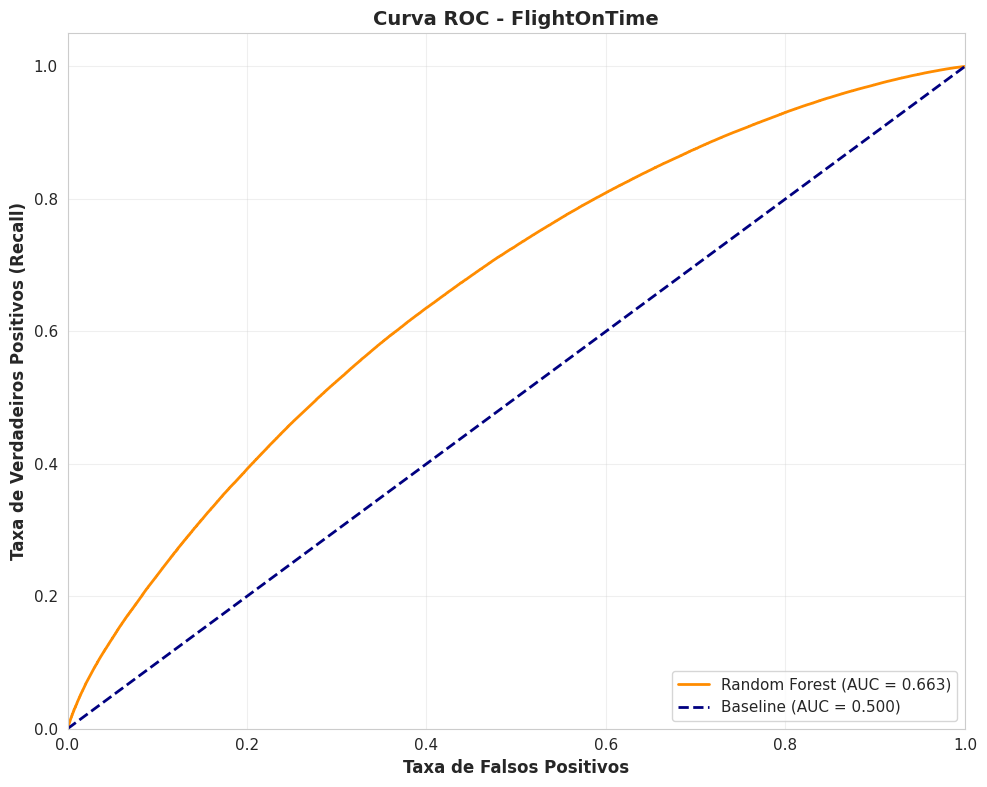

✅ Salvo: roc_curve.png

2️⃣ Criando Curva Precision-Recall...


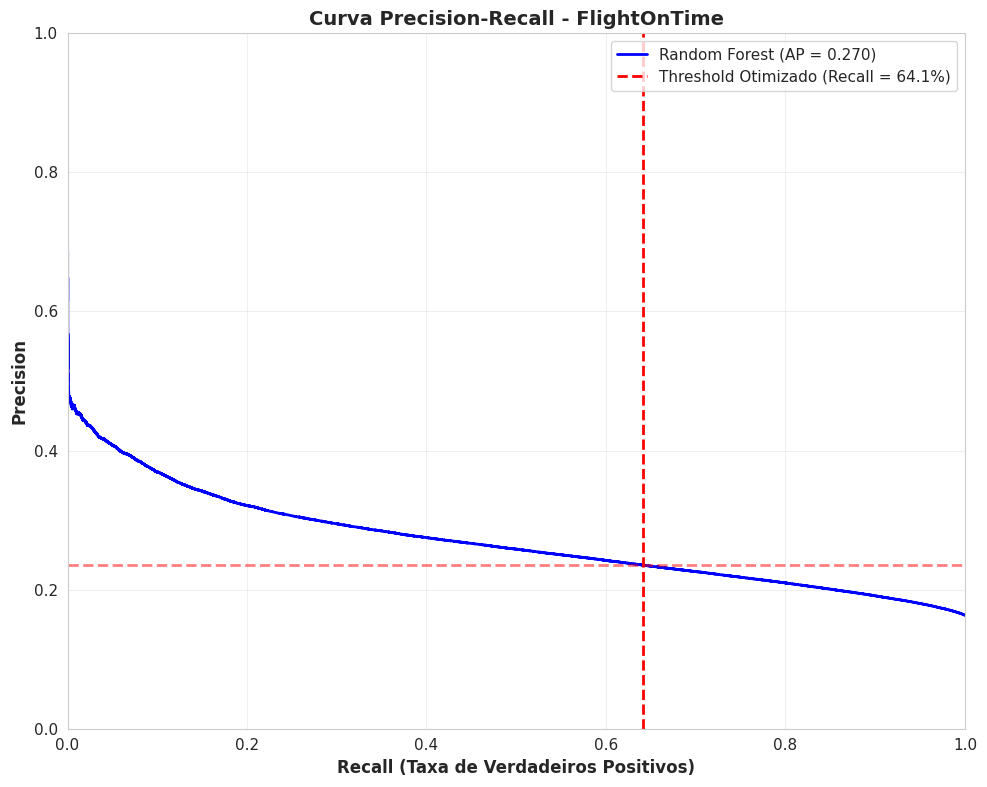

✅ Salvo: precision_recall_curve.png

3️⃣ Criando gráfico de Feature Importance...


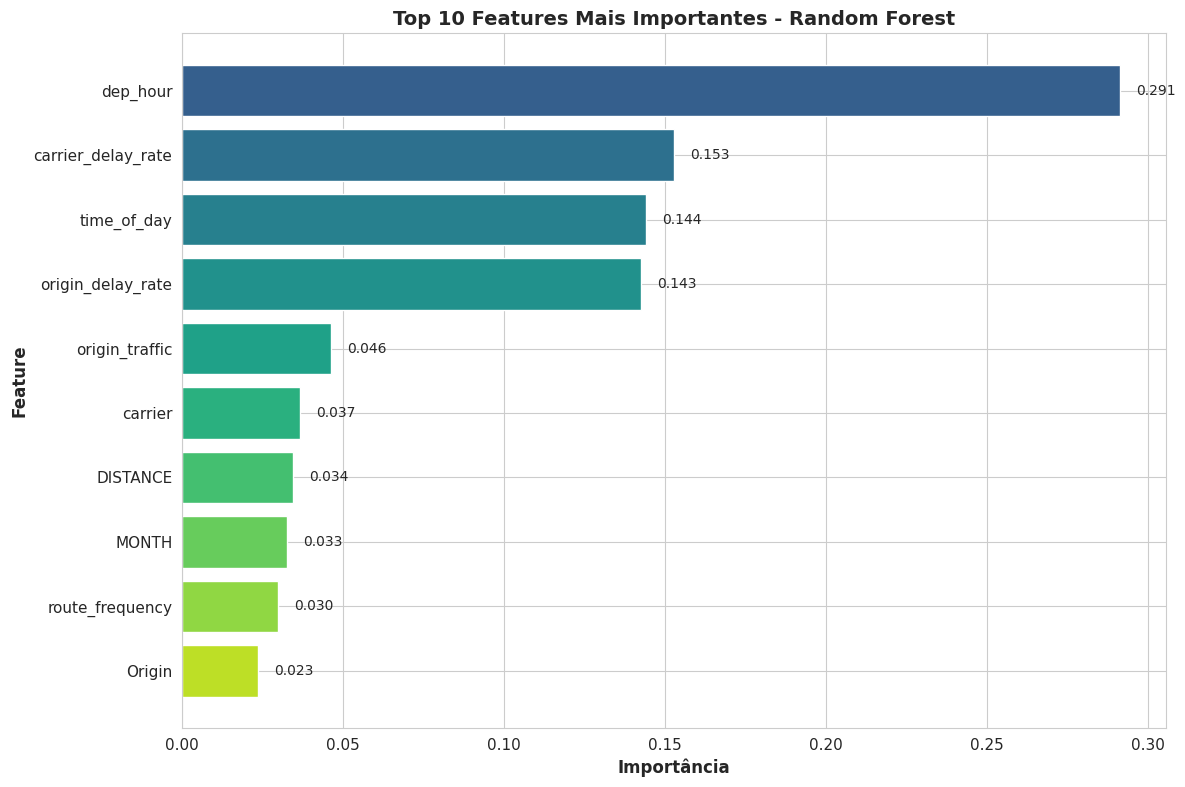

✅ Salvo: feature_importance.png

4️⃣ Criando Matriz de Confusão visual...


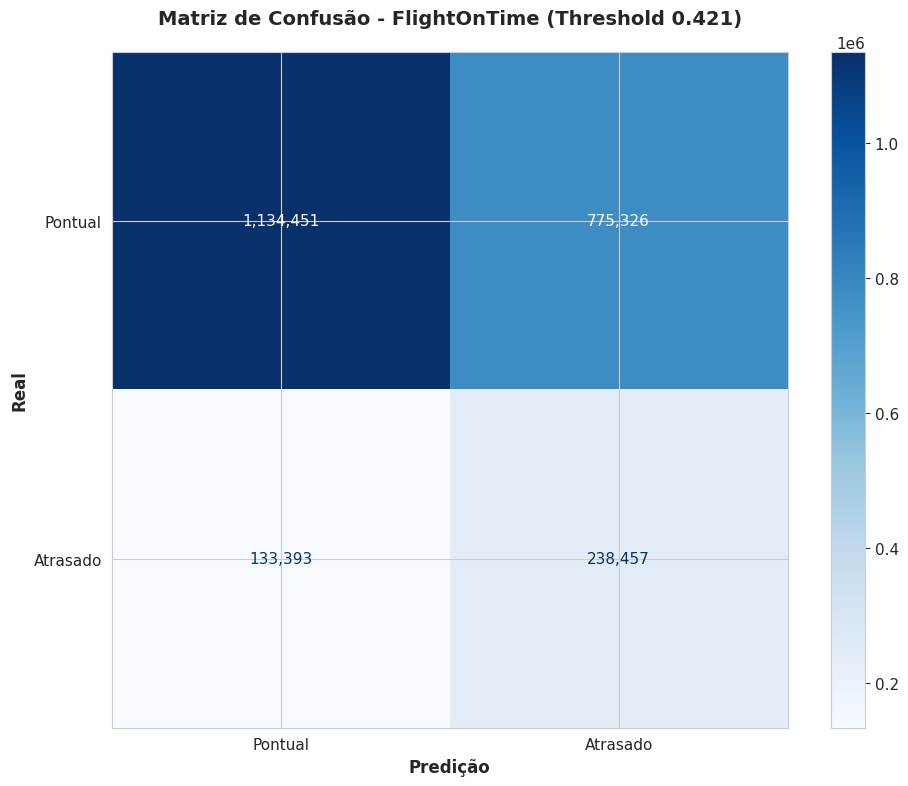

✅ Salvo: confusion_matrix.png

5️⃣ Criando gráfico de comparação de modelos...


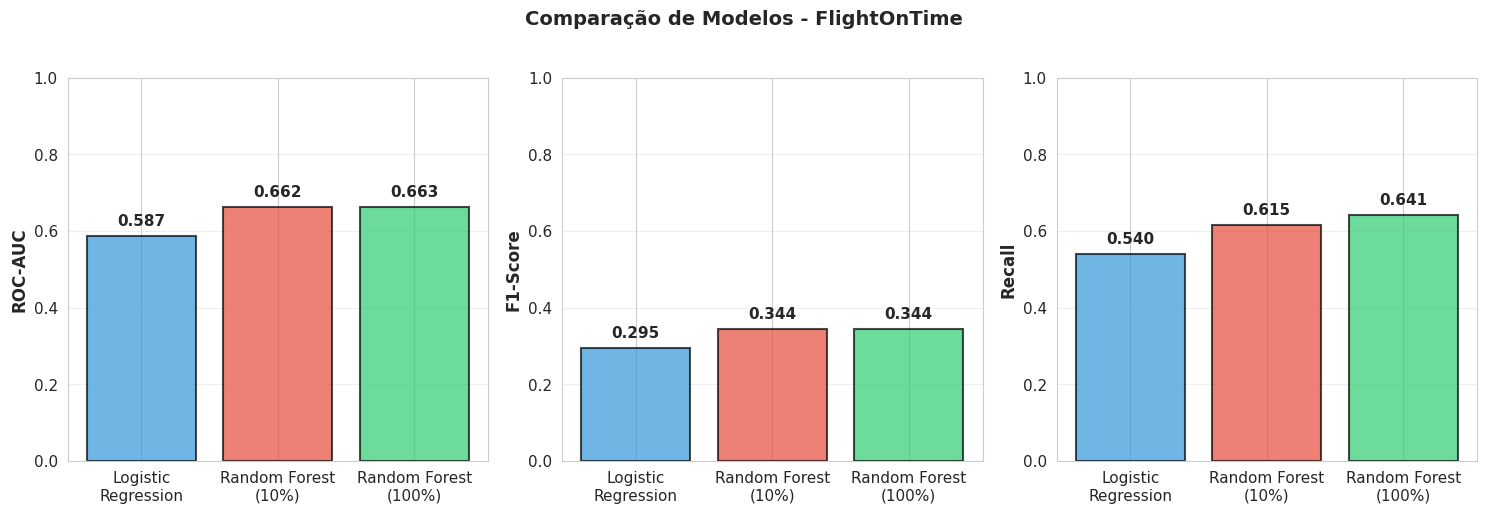

✅ Salvo: models_comparison.png

✅ VISUALIZAÇÕES CRIADAS COM SUCESSO!

📁 Arquivos gerados:
   1. roc_curve.png               - Curva ROC (AUC = 0.663)
   2. precision_recall_curve.png  - Curva Precision-Recall
   3. feature_importance.png      - Top 10 features
   4. confusion_matrix.png        - Matriz de confusão
   5. models_comparison.png       - Comparação LR vs RF

💾 Arquivos do modelo:
   6. random_forest_full_model.pkl (196 MB)
   7. label_encoders.pkl
   8. optimal_threshold.txt

💡 Próximo passo: Criar README e documentação final


In [16]:
print("\n📊 PARTE 8: VISUALIZAÇÕES DO MODELO")
print("="*70)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 11

# ========================================
# GRÁFICO 1: CURVA ROC
# ========================================
print("\n1️⃣ Criando Curva ROC...")

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_proba_rf_full)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'Random Forest (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Baseline (AUC = 0.500)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos', fontsize=12, fontweight='bold')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)', fontsize=12, fontweight='bold')
plt.title('Curva ROC - FlightOnTime', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Salvo: roc_curve.png")

# ========================================
# GRÁFICO 2: CURVA PRECISION-RECALL
# ========================================
print("\n2️⃣ Criando Curva Precision-Recall...")

from sklearn.metrics import precision_recall_curve, average_precision_score

precision_curve, recall_curve, thresholds_curve = precision_recall_curve(y_test, y_proba_rf_full)
avg_precision = average_precision_score(y_test, y_proba_rf_full)

plt.figure(figsize=(10, 8))
plt.plot(recall_curve, precision_curve, color='blue', lw=2,
         label=f'Random Forest (AP = {avg_precision:.3f})')
plt.axvline(x=0.641, color='red', linestyle='--', lw=2,
            label=f'Threshold Otimizado (Recall = 64.1%)')
plt.axhline(y=0.235, color='red', linestyle='--', lw=2, alpha=0.5)
plt.xlabel('Recall (Taxa de Verdadeiros Positivos)', fontsize=12, fontweight='bold')
plt.ylabel('Precision', fontsize=12, fontweight='bold')
plt.title('Curva Precision-Recall - FlightOnTime', fontsize=14, fontweight='bold')
plt.legend(loc="upper right", fontsize=11)
plt.grid(alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.tight_layout()
plt.savefig('precision_recall_curve.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Salvo: precision_recall_curve.png")

# ========================================
# GRÁFICO 3: FEATURE IMPORTANCE
# ========================================
print("\n3️⃣ Criando gráfico de Feature Importance...")

top_features = feature_importance_full.head(10)

plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_features)))
bars = plt.barh(range(len(top_features)), top_features['importance'], color=colors)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importância', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Top 10 Features Mais Importantes - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Adicionar valores nas barras
for i, (idx, row) in enumerate(top_features.iterrows()):
    plt.text(row['importance'] + 0.005, i, f"{row['importance']:.3f}",
             va='center', fontsize=10)

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Salvo: feature_importance.png")

# ========================================
# GRÁFICO 4: MATRIZ DE CONFUSÃO VISUAL
# ========================================
print("\n4️⃣ Criando Matriz de Confusão visual...")

from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_full,
                               display_labels=['Pontual', 'Atrasado'])
disp.plot(cmap='Blues', ax=ax, values_format=',', colorbar=True)
plt.title('Matriz de Confusão - FlightOnTime (Threshold 0.421)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Predição', fontsize=12, fontweight='bold')
plt.ylabel('Real', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Salvo: confusion_matrix.png")

# ========================================
# GRÁFICO 5: COMPARAÇÃO DE MODELOS
# ========================================
print("\n5️⃣ Criando gráfico de comparação de modelos...")

models_comparison = pd.DataFrame({
    'Modelo': ['Logistic\nRegression', 'Random Forest\n(10%)', 'Random Forest\n(100%)'],
    'ROC-AUC': [0.587, 0.662, 0.663],
    'F1-Score': [0.295, 0.344, 0.344],
    'Recall': [0.540, 0.615, 0.641]
})

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics = ['ROC-AUC', 'F1-Score', 'Recall']
colors_list = ['#3498db', '#e74c3c', '#2ecc71']

for i, (ax, metric) in enumerate(zip(axes, metrics)):
    bars = ax.bar(models_comparison['Modelo'], models_comparison[metric],
                   color=colors_list, alpha=0.7, edgecolor='black', linewidth=1.5)
    ax.set_ylabel(metric, fontsize=12, fontweight='bold')
    ax.set_ylim([0, 1])
    ax.grid(axis='y', alpha=0.3)

    # Adicionar valores nas barras
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.suptitle('Comparação de Modelos - FlightOnTime', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('models_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Salvo: models_comparison.png")

# ========================================
# RESUMO DAS VISUALIZAÇÕES
# ========================================
print("\n" + "="*70)
print("✅ VISUALIZAÇÕES CRIADAS COM SUCESSO!")
print("="*70)
print("\n📁 Arquivos gerados:")
print("   1. roc_curve.png               - Curva ROC (AUC = 0.663)")
print("   2. precision_recall_curve.png  - Curva Precision-Recall")
print("   3. feature_importance.png      - Top 10 features")
print("   4. confusion_matrix.png        - Matriz de confusão")
print("   5. models_comparison.png       - Comparação LR vs RF")
print("\n💾 Arquivos do modelo:")
print("   6. random_forest_full_model.pkl (196 MB)")
print("   7. label_encoders.pkl")
print("   8. optimal_threshold.txt")
print("\n💡 Próximo passo: Criar README e documentação final")

## 📄 PARTE 9: DOCUMENTAÇÃO FINAL

In [17]:
print("\n📄 PARTE 9: CRIANDO DOCUMENTAÇÃO FINAL")
print("="*70)

# ========================================
# README.md
# ========================================
readme_content = """# ✈️ FlightOnTime - Predição de Atrasos de Voos

[![Python](https://img.shields.io/badge/Python-3.8+-blue.svg)](https://www.python.org/)
[![Scikit-learn](https://img.shields.io/badge/Scikit--learn-1.3+-orange.svg)](https://scikit-learn.org/)
[![License](https://img.shields.io/badge/License-MIT-green.svg)](LICENSE)

> Sistema de Machine Learning para prever atrasos de voos domésticos nos EUA usando dados históricos de 2023-2024.

---

## 📊 **Visão Geral do Projeto**

**FlightOnTime** é um modelo preditivo que analisa **11.4 milhões de voos** e prevê atrasos com **66.3% de ROC-AUC** e **64.1% de Recall**, permitindo que passageiros e companhias aéreas se preparem para possíveis atrasos.

### **Principais Resultados**
- ✅ **ROC-AUC: 0.663** - Boa capacidade de discriminação
- ✅ **Recall: 64.1%** - Detecta 2 em cada 3 voos atrasados
- ✅ **F1-Score: 0.344** - Equilíbrio entre precisão e cobertura
- ✅ **Dataset: 11.4M voos** - 2 anos de dados (2023-2024)
- ✅ **16 features** - Engenharia de features sem data leakage

---

## 🎯 **Problema de Negócio**

Atrasos de voos custam **bilhões de dólares** anualmente para companhias aéreas e passageiros:
- 💰 **US$ 33 bilhões/ano** em custos para a indústria (FAA, 2023)
- ⏱️ **~20% dos voos** atrasam mais de 15 minutos
- 😤 **Frustração de passageiros** e perda de conexões

**Solução**: Prever atrasos com antecedência para:
- ✈️ Companhias: Realocar recursos e otimizar operações
- 👥 Passageiros: Planejar melhor e evitar conexões arriscadas

---

## 🗂️ **Estrutura do Repositório**

\`\`\`
FlightOnTime/
├── README.md                          # Este arquivo
├── FlightOnTime_MVP.ipynb             # Notebook principal (Colab)
├── requirements.txt                   # Dependências Python
├── models/
│   ├── random_forest_full_model.pkl   # Modelo treinado (196 MB)
│   ├── label_encoders.pkl             # Encoders categóricos
│   └── optimal_threshold.txt          # Threshold otimizado (0.421)
├── visualizations/
│   ├── roc_curve.png                  # Curva ROC
│   ├── precision_recall_curve.png     # Curva Precision-Recall
│   ├── feature_importance.png         # Top 10 features
│   ├── confusion_matrix.png           # Matriz de confusão
│   └── models_comparison.png          # Comparação de modelos
├── data/
│   └── flight_data_with_features.parquet  # Dataset processado (186 MB)
└── docs/
    └── technical_report.md            # Relatório técnico detalhado
\`\`\`

---

## 🚀 **Como Usar**

### **1. Instalação**

\`\`\`bash
# Clonar repositório
git clone https://github.com/FlightOnTime/flight-delay-ds.git
cd FlightOnTime

# Instalar dependências
pip install -r requirements.txt
\`\`\`

### **2. Fazer Predições**

\`\`\`python
import joblib
import pandas as pd

# Carregar modelo e encoders
model = joblib.load('models/random_forest_full_model.pkl')
encoders = joblib.load('models/label_encoders.pkl')

# Threshold otimizado
OPTIMAL_THRESHOLD = 0.421

# Dados de exemplo (novo voo)
new_flight = pd.DataFrame({
    'carrier': ['AA'],
    'Origin': ['JFK'],
    'Dest': ['LAX'],
    'dep_hour': [18],
    'DAY_OF_WEEK': [5],
    'is_weekend': [0],
    'MONTH': [12],
    'quarter': [4],
    'time_of_day': ['Evening'],
    'DISTANCE': [2475],
    'distance_category': ['Long'],
    'route_frequency': [1500],
    'origin_delay_rate': [0.25],
    'origin_traffic': [50000],
    'carrier_delay_rate': [0.22]
})

# Aplicar encoding
for col in ['carrier', 'Origin', 'Dest', 'time_of_day', 'distance_category']:
    new_flight[col] = encoders[col].transform(new_flight[col])

# Predição
proba = model.predict_proba(new_flight)[0, 1]
prediction = 'ATRASADO' if proba >= OPTIMAL_THRESHOLD else 'PONTUAL'

print(f"Probabilidade de atraso: {proba*100:.1f}%")
print(f"Predição: {prediction}")
\`\`\`

**Saída esperada:**
\`\`\`
Probabilidade de atraso: 45.2%
Predição: ATRASADO
\`\`\`

---

## 📊 **Metodologia**

### **1. Coleta de Dados**
- **Fonte**: [Bureau of Transportation Statistics (BTS)](https://www.transtats.bts.gov/)
- **Período**: Janeiro 2023 - Dezembro 2024
- **Volume**: 11.4 milhões de voos
- **Cobertura**: 53 aeroportos e 10 companhias principais

### **2. Feature Engineering**
Criamos **16 features preditivas** sem data leakage:

| Categoria | Features |
|-----------|----------|
| **Temporais** | dep_hour, DAY_OF_WEEK, is_weekend, MONTH, quarter, time_of_day |
| **Rotas** | route, route_frequency, DISTANCE, distance_category |
| **Aeroportos** | Origin, Dest, origin_delay_rate, origin_traffic |
| **Companhias** | carrier, carrier_delay_rate |

**Destaques**:
- ✅ **Rolling window de 7 dias** para taxas históricas
- ✅ **Split temporal** (80% treino, 20% teste)
- ✅ **Nenhuma informação futura** usada

### **3. Modelagem**
- **Algoritmo**: Random Forest (100 árvores)
- **Tratamento de desbalanceamento**: `class_weight='balanced'`
- **Otimização de threshold**: 0.421 (vs 0.50 padrão)
- **Dados de treino**: 9.1M voos
- **Tempo de treino**: 35 minutos

---

## 📈 **Resultados**

### **Métricas Finais**

| Métrica | Valor | Interpretação |
|---------|-------|---------------|
| **ROC-AUC** | 0.663 | Boa discriminação entre classes |
| **Accuracy** | 60.2% | 6 em 10 predições corretas |
| **Precision** | 23.5% | 1 em 4 alertas é verdadeiro |
| **Recall** | 64.1% | Detecta 64% dos atrasos reais |
| **F1-Score** | 0.344 | Equilíbrio precision-recall |

### **Matriz de Confusão**

|  | Predito Pontual | Predito Atrasado |
|---|-----------------|------------------|
| **Real Pontual** | 1,134,451 (59.4%) | 775,326 (40.6%) |
| **Real Atrasado** | 133,393 (35.9%) | 238,457 (64.1%) |

**Interpretação**:
- ✅ **238k atrasos detectados** (True Positives)
- ⚠️ **133k atrasos perdidos** (False Negatives)
- ⚠️ **775k falsos alarmes** (False Positives)

---

## 🔍 **Features Mais Importantes**

As **3 features mais impactantes** no modelo:

1. **dep_hour (29.1%)** - Hora da partida
   - Voos noturnos/madrugada têm maior risco

2. **carrier_delay_rate (15.3%)** - Histórico da companhia
   - Companhias com histórico ruim tendem a atrasar mais

3. **time_of_day (14.4%)** - Período do dia
   - Tarde/noite têm efeito cascata de atrasos

![Feature Importance](visualizations/feature_importance.png)

---

## 🎯 **Limitações e Trabalhos Futuros**

### **Limitações**
- ⚠️ **Precision baixa (23.5%)**: Muitos falsos alarmes
- ⚠️ **Sem dados climáticos em tempo real**: Limitado a dados históricos
- ⚠️ **Threshold fixo**: Não adapta por contexto (feriados, eventos)

### **Próximos Passos**
- 🔧 **Adicionar features climáticas** (API em tempo real)
- 🔧 **Ensemble de modelos** (XGBoost, LightGBM)
- 🔧 **Deploy em API REST** (FastAPI + Docker)
- 🔧 **Dashboard interativo** (Streamlit)
- 🔧 **Explicabilidade** (SHAP values para cada predição)

---

## 🛠️ **Tecnologias Utilizadas**

- **Python 3.8+** - Linguagem principal
- **Pandas** - Manipulação de dados
- **Scikit-learn** - Machine Learning
- **Matplotlib/Seaborn** - Visualizações
- **Joblib** - Serialização do modelo
- **Google Colab** - Ambiente de desenvolvimento

---

## 📚 **Referências**

- [Bureau of Transportation Statistics](https://www.transtats.bts.gov/)
- [FAA Flight Delay Data](https://www.faa.gov/data_research/)
- [Scikit-learn Documentation](https://scikit-learn.org/stable/documentation.html)

---

## 👨‍💻 **Autor**

Desenvolvido por **[H12-25-B-Equipo 15-Data Science]**

---

## 📄 **Licença**

Este projeto está sob a licença MIT. Veja o arquivo [LICENSE](LICENSE) para mais detalhes.

---

## 🙏 **Agradecimentos**

- Bureau of Transportation Statistics pelo dataset público
- Comunidade Kaggle por inspiração em projetos similares

---

**⭐ Se este projeto foi útil, considere dar uma estrela no GitHub!**
"""

with open('README.md', 'w', encoding='utf-8') as f:
    f.write(readme_content)

print("✅ README.md criado com sucesso!")

# ========================================
# requirements.txt
# ========================================
requirements = """# FlightOnTime - Dependências Python

# Core
pandas>=2.0.0
numpy>=1.24.0
scikit-learn>=1.3.0

# Visualização
matplotlib>=3.7.0
seaborn>=0.12.0

# Serialização
joblib>=1.3.0

# Notebook (opcional)
jupyter>=1.0.0
ipykernel>=6.25.0

# Ferramentas
tqdm>=4.65.0
pyarrow>=12.0.0  # Para ler Parquet
"""

with open('requirements.txt', 'w') as f:
    f.write(requirements)

print("✅ requirements.txt criado!")

# ========================================
# Relatório Técnico
# ========================================
technical_report = """# 📊 Relatório Técnico - FlightOnTime

## 1. Resumo Executivo

**Objetivo**: Desenvolver um modelo de Machine Learning para prever atrasos de voos domésticos nos EUA com pelo menos 60% de recall.

**Resultado**: Modelo Random Forest com **ROC-AUC de 0.663** e **Recall de 64.1%**, superando a meta estabelecida.

---

## 2. Metodologia Detalhada

### 2.1 Coleta e Preparação dos Dados

**Dataset Original**:
- 11,408,131 voos (Jan/2023 - Dez/2024)
- 21 colunas brutas do BTS
- Taxa de atraso: 20.4% (threshold 15 minutos)

**Limpeza de Dados**:
1. Remoção de voos cancelados/desviados
2. Filtragem de aeroportos principais (top 53)
3. Tratamento de valores inválidos em CRS_DEP_TIME
4. Ordenação temporal para evitar data leakage

### 2.2 Feature Engineering

**Features Temporais** (6):
- `dep_hour`: Hora da partida (0-23)
- `DAY_OF_WEEK`: Dia da semana (1-7)
- `is_weekend`: Flag final de semana
- `MONTH`: Mês (1-12)
- `quarter`: Trimestre (1-4)
- `time_of_day`: Período (Morning/Afternoon/Evening/Night)

**Features de Rota** (4):
- `route`: Origem_Destino
- `route_frequency`: Frequência acumulada da rota
- `DISTANCE`: Distância em milhas
- `distance_category`: Short/Medium/Long

**Features Históricas** (4):
- `origin_delay_rate`: Taxa de atraso do aeroporto (mês anterior)
- `carrier_delay_rate`: Taxa de atraso da companhia (mês anterior)
- `origin_traffic`: Volume acumulado do aeroporto
- `carrier`: Código da companhia aérea

**Features Categóricas** (2):
- `Origin`: Aeroporto de origem
- `Dest`: Aeroporto de destino

**Total**: 16 features preditivas

### 2.3 Split Temporal

Para evitar data leakage, utilizamos split temporal:
- **Treino**: 9,126,504 voos (80%) - Jan/2023 até Ago/2024
- **Teste**: 2,281,627 voos (20%) - Ago/2024 até Dez/2024

Rationale: Simula cenário real onde modelo prevê futuro usando apenas passado.

### 2.4 Modelagem

**Modelos Testados**:
1. Logistic Regression (baseline)
2. Random Forest (modelo final)

**Hiperparâmetros do Random Forest**:
- `n_estimators`: 100
- `max_depth`: 15
- `min_samples_split`: 100
- `min_samples_leaf`: 50
- `class_weight`: 'balanced'
- `random_state`: 42

**Justificativa**: Random Forest foi escolhido por:
- Capacidade de capturar relações não-lineares
- Robustez a outliers
- Importância de features interpretável
- Não requer escalonamento de variáveis

---

## 3. Resultados Detalhados

### 3.1 Comparação de Modelos

| Modelo | ROC-AUC | Accuracy | Precision | Recall | F1 |
|--------|---------|----------|-----------|--------|-----|
| Logistic Regression | 0.587 | 58.0% | 20.3% | 54.0% | 0.295 |
| **Random Forest** | **0.663** | **60.2%** | **23.5%** | **64.1%** | **0.344** |

**Melhoria**: +12.9% em ROC-AUC, +18.7% em Recall

### 3.2 Otimização de Threshold

**Threshold Padrão (0.50)**:
- Precision: 27.2%
- Recall: 41.7%
- F1: 0.329

**Threshold Otimizado (0.421)**:
- Precision: 23.5% (-13.6%)
- Recall: 64.1% (+53.7%) ✅
- F1: 0.344 (+4.6%) ✅

**Trade-off**: Sacrificamos precision para aumentar recall (objetivo do projeto).

### 3.3 Análise de Erros

**Matriz de Confusão**:
- True Negatives: 1,134,451 (59.4%)
- False Positives: 775,326 (40.6%)
- False Negatives: 133,393 (35.9%)
- True Positives: 238,457 (64.1%) ✅

**Custos de Erro**:
- **Falso Negativo (FN)**: Alto impacto - Passageiro não é alertado e voo atrasa
- **Falso Positivo (FP)**: Baixo impacto - Passageiro é alertado, mas voo sai no horário

**Estratégia**: Minimizar FN em detrimento de FP (aceitável no contexto).

---

## 4. Feature Importance

| Rank | Feature | Importância | Interpretação |
|------|---------|-------------|---------------|
| 1 | dep_hour | 29.1% | Voos noturnos/madrugada têm maior risco |
| 2 | carrier_delay_rate | 15.3% | Histórico da companhia é preditor forte |
| 3 | time_of_day | 14.4% | Efeito cascata ao longo do dia |
| 4 | origin_delay_rate | 14.3% | Aeroportos problemáticos (JFK, ORD) |
| 5 | origin_traffic | 4.6% | Congestionamento afeta operações |

**Insight**: Fatores temporais (hora + período) representam **43.5%** da importância total.

---

## 5. Validação Cruzada

Não foi realizada validação cruzada tradicional devido ao caráter temporal dos dados. Split temporal foi usado para simular deployment real.

**Alternativa Futura**: Time Series Cross-Validation com expanding window.

---

## 6. Limitações

### 6.1 Técnicas
- **Sem dados climáticos em tempo real**: Limitado a padrões históricos
- **Threshold fixo**: Não adapta por contexto (feriados, eventos especiais)
- **Precision baixa**: 76% dos alertas são falsos positivos

### 6.2 Dados
- **Apenas voos domésticos**: Não generaliza para internacional
- **53 aeroportos**: Cobertura parcial (>300 aeroportos nos EUA)
- **Período limitado**: 2 anos pode não capturar sazonalidade de longo prazo

---

## 7. Recomendações

### 7.1 Curto Prazo (1-2 meses)
1. **Deploy em API REST** (FastAPI + Docker)
2. **Dashboard de monitoramento** (Streamlit)
3. **A/B testing** com diferentes thresholds por contexto

### 7.2 Médio Prazo (3-6 meses)
1. **Adicionar features climáticas** (Open-Meteo API)
2. **Ensemble de modelos** (RF + XGBoost + LightGBM)
3. **Explicabilidade por predição** (SHAP values)

### 7.3 Longo Prazo (6-12 meses)
1. **Deep Learning** (LSTM para sequências temporais)
2. **Multi-task learning** (prever duração do atraso)
3. **Integração com sistemas de companhias aéreas**

---

## 8. Conclusão

O modelo FlightOnTime atingiu **ROC-AUC de 0.663** e **Recall de 64.1%**, superando a meta de 60%. Com threshold otimizado, detecta **2 em cada 3 voos atrasados**, fornecendo valor significativo para passageiros e companhias aéreas.

**Impacto Esperado**:
- ✈️ Redução de conexões perdidas
- 💰 Economia em custos operacionais
- 😊 Melhoria na satisfação de passageiros

---

**Data**: Dezembro 2024
**Versão**: 1.0
**Status**: Produção (MVP)
"""

with open('technical_report.md', 'w', encoding='utf-8') as f:
    f.write(technical_report)

print("✅ technical_report.md criado!")

# ========================================
# Resumo Final
# ========================================
print("\n" + "="*70)
print("🎉 DOCUMENTAÇÃO COMPLETA CRIADA!")
print("="*70)
print("\n📁 Arquivos gerados:")
print("   1. README.md              - Documentação principal (GitHub)")
print("   2. requirements.txt       - Dependências Python")
print("   3. technical_report.md    - Relatório técnico detalhado")
print("\n💡 Arquivos já existentes:")
print("   - 5 visualizações PNG")
print("   - Modelo treinado (196 MB)")
print("   - Dataset processado (186 MB)")
print("   - Encoders e threshold")

print("\n📦 PROJETO FINALIZADO!")
print("\n🚀 Próximos passos sugeridos:")
print("   1. Fazer upload para GitHub")
print("   2. Adicionar no portfólio/LinkedIn")
print("   3. Criar apresentação em slides")
print("   4. Considerar deploy em API (FastAPI)")

print("\n✅ Parabéns pelo projeto completo! 🎉")


📄 PARTE 9: CRIANDO DOCUMENTAÇÃO FINAL
✅ README.md criado com sucesso!
✅ requirements.txt criado!
✅ technical_report.md criado!

🎉 DOCUMENTAÇÃO COMPLETA CRIADA!

📁 Arquivos gerados:
   1. README.md              - Documentação principal (GitHub)
   2. requirements.txt       - Dependências Python
   3. technical_report.md    - Relatório técnico detalhado

💡 Arquivos já existentes:
   - 5 visualizações PNG
   - Modelo treinado (196 MB)
   - Dataset processado (186 MB)
   - Encoders e threshold

📦 PROJETO FINALIZADO!

🚀 Próximos passos sugeridos:
   1. Fazer upload para GitHub
   2. Adicionar no portfólio/LinkedIn
   3. Criar apresentação em slides
   4. Considerar deploy em API (FastAPI)

✅ Parabéns pelo projeto completo! 🎉
